## Money Flow Index

$$\mathrm{MFI} = 100 - \frac{100}{1 + \mathrm{MFR}}$$
$$\mathrm{MFR} = \frac{\mbox{14 periods positive money flow}}{\mbox{14 periods negative money flow}}$$

여기서 money flow는 다음과 같이 계산된다

$$\mbox{raw money flow} = \mbox{typical price} \cdot \mbox{volume}$$
$$\mbox{typical price}_t = \frac{H_t + L_t + C_t}{3}$$

### Documentation

Money Flow Index(MFI)는 주식이나 다른 자산의 거래량과 가격 변동을 함께 고려하는 기술적 분석 도구다. 이 지표는 주로 과매수 또는 과매도 상태를 식별하는 데 사용된다. MFI 값은 0에서 100 사이에서 움직이며, 특정 임계값을 기준으로 해석된다.

- 과매수 상태: MFI 값이 80 이상일 때, 자산이 과매수 상태로 간주되어 가격이 상당히 높아져서 조정이 일어날 가능성이 있다.
- 과매도 상태: 반대로 MFI 값이 20 이하일 때, 자산이 과매도 상태로 간주되어 가격이 너무 낮아져서 반등할 가능성이 있다.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import money_flow_index
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [28]:
money_flow = money_flow_index(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    volume = data['Volume'],
    window = 14,
    fillna = False
)

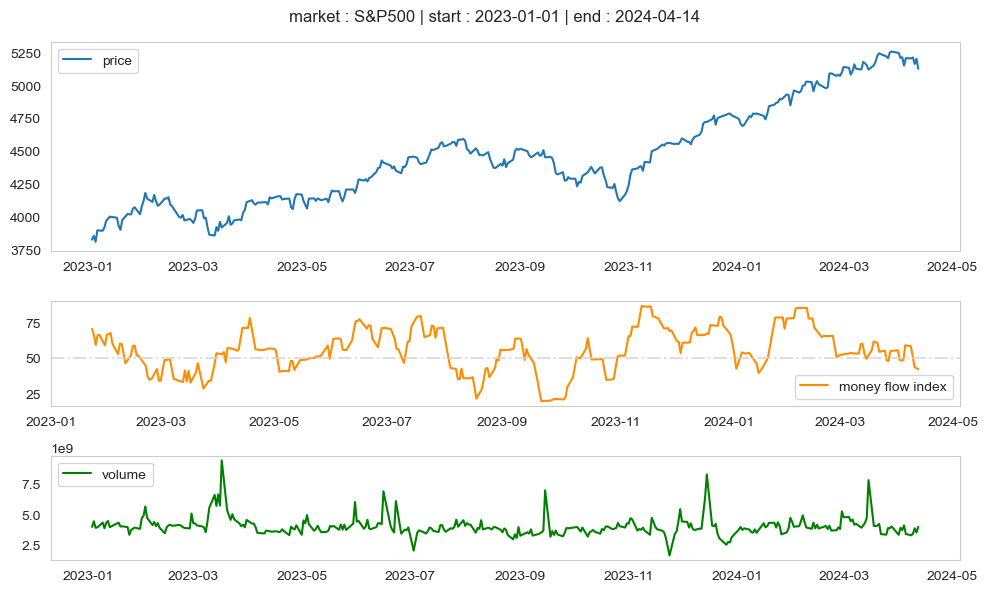

In [32]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(money_flow, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 50, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['money flow index'])

plt.subplot(gs[2])
plt.plot(data['Volume'], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()